# Data Gathering and Problem Definition

O meu segundo projeto de machine learning. Irei analisar os dados, tratá-los, se necessário e aplicarei vários modelos de classificação: svm, decision tree, gaussian bayes, knn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
from pandas import datetime
%matplotlib inline
%config IPCompleter.greedy=True
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [0]:
import io
iris_data = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [4]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Analysis

In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
print(iris_data.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [7]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
fig = px.scatter_matrix(iris_data,
    dimensions=["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"],
    color="Species")


fig.update_layout(title='Comprimento da Pétala por Espécie',
                  dragmode='select',
                  width=1000,
                  height=600)


fig.show()

Com esta matriz é possível identificar à primeira vista alguns parametros discriminatórios, nomeadamente o comprimento da pétala e a largura da pétala. Os comprimentos e larguras do Sepal já não é possível descriminar desta forma, precisamos de uma matriz de correlação por heatmap

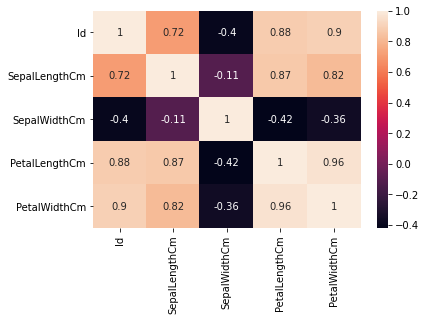

In [9]:
#iris_data.drop('Id', axis=1, inplace=True)
myBasicCorr = iris_data.corr()
sns.heatmap(myBasicCorr, annot = True)

Com esta matriz já é possível identificar os parametros que têm correlação direta e os que não têm qualquer tipo de correlação. 
Quanto maior for o comprimento da pétala, mairo será a largura da pétala
A largura do Sepal não tem relação nenhuma com o comprimento e a largura da pétala

In [10]:
fig0 = go.Figure()
fig0.add_trace(go.Violin(x = iris_data['Species'], y = iris_data['PetalLengthCm'], line_color = 'green',
                    name='Previsão'))
#fig0.add_trace(go.Scatter( y = covid_treated['confirmados_novos'],
 #                   mode='lines',
  #                  name='Casos Confirmados', 
   #                 ))
fig0.update_layout(title='Comprimento da Pétala por Espécie',
                   xaxis_title='Species',
                   yaxis_title='Comprimento da Pétala',)
fig0.update_traces(meanline_visible=True)

fig0.show()

In [11]:
fig1 = go.Figure()
fig1.add_trace(go.Violin(x = iris_data['Species'], y = iris_data['PetalWidthCm'], line_color = 'green',
                    name='Previsão'))
#fig0.add_trace(go.Scatter( y = covid_treated['confirmados_novos'],
 #                   mode='lines',
  #                  name='Casos Confirmados', 
   #                 ))
fig1.update_layout(title='Largura da Pétala por Espécie',
                   xaxis_title='Species',
                   yaxis_title='Largura da Pétala')

fig1.update_traces(meanline_visible=True)

fig1.show()

In [12]:
fig2 = go.Figure()
fig2.add_trace(go.Violin(x = iris_data['Species'], y = iris_data['SepalLengthCm'], line_color = 'red',
                    name='Previsão'))
#fig0.add_trace(go.Scatter( y = covid_treated['confirmados_novos'],
 #                   mode='lines',
  #                  name='Casos Confirmados', 
   #                 ))
fig2.update_layout(title='Comprimento do Sepal por Espécie',
                   xaxis_title='Species',
                   yaxis_title='Comprimento do Sepal')

fig2.update_traces(meanline_visible=True)

fig2.show()

In [13]:
fig3 = go.Figure()
fig3.add_trace(go.Violin(x = iris_data['Species'], y = iris_data['SepalWidthCm'], line_color = 'red',
                    name='Previsão'))
#fig0.add_trace(go.Scatter( y = covid_treated['confirmados_novos'],
 #                   mode='lines',
  #                  name='Casos Confirmados', 
   #                 ))
fig3.update_layout(title='Largura do Sepal por Espécie',
                   xaxis_title='Species',
                   yaxis_title='Largura do Sepal')

fig3.update_traces(meanline_visible=True)

fig3.show()

In [14]:
iris_setosa = iris_data.loc[(iris_data['Species'] =="Iris-setosa")]
iris_versicolor = iris_data.loc[(iris_data['Species'] =="Iris-versicolor")]
iris_virginica = iris_data.loc[(iris_data['Species'] =="Iris-virginica")]
len(iris_virginica)


50

In [15]:
fig5 = ff.create_distplot([iris_setosa['PetalLengthCm'], iris_virginica['PetalLengthCm'], iris_versicolor['PetalLengthCm']], group_labels=['Setosa', 'Virginica', 'Versicolor'], bin_size=.10)

fig5.update_layout(title_text='Comprimento da Petala por Espécie')

fig5.show()

Através do parametro - Comprimento das Pétalas - é possível verificar uma discrepância entre espécies. A Setosa tem pétalas curtas, a Versicolor tem pétalas mais compridas e espaçadas da setosa e uma pequena parte da curva cruza com a Virginica. No entanto é possível discriminar todas as espécies neste parâmetro



In [16]:
fig7 = ff.create_distplot([iris_setosa['PetalWidthCm'], iris_virginica['PetalWidthCm'], iris_versicolor['PetalWidthCm']], group_labels=['Setosa', 'Virginica', 'Versicolor'], bin_size=.10)

fig7.update_layout(title_text='Largura da Petala por Espécie')

fig7.show()

Através do parametro - Largura das Pétalas - é possível verificar uma discrepância entre espécies. A Setosa tem pétalas finas, a Versicolor tem pétalas mais largas e espaçadas da setosa e uma pequena parte da curva cruza com a Virginica. No entanto é possível discriminar todas as espécies neste parâmetro

In [17]:
fig8 = ff.create_distplot([iris_setosa['SepalLengthCm'], iris_virginica['SepalLengthCm'], iris_versicolor['SepalLengthCm']], group_labels=['Setosa', 'Virginica', 'Versicolor'], bin_size=.10)

fig8.update_layout(title_text='Comprimento do Sepal por Espécie')

fig8.show()

Através do parametro - Comprimento dos Sepals - já não é possível verificar uma discrepância entre espécies à primeira vista. A Setosa tem sepals curtas (e é a única que se consegue discriminar. As outras duas espécies já se cruzam entre si, no entanto vemos que os valores mais baixos pertencem à Versicolor, e os valores mais altos pertencem à virginica.

In [18]:
fig9 = ff.create_distplot([iris_setosa['SepalWidthCm'], iris_virginica['SepalWidthCm'], iris_versicolor['SepalWidthCm']], group_labels=['Setosa', 'Virginica', 'Versicolor'], bin_size=.10)

fig9.update_layout(title_text='Largura do Sepal por Espécie')

fig9.show()

Através do parametro - Largura dos Sepals - já não é possível verificar uma discrepância entre espécies à primeira vista. A Setosa é a especie que tem as sepals mais largas (e é a única que se consegue discriminar). As outras duas espécies já se cruzam entre si, onde o pico das curvas são em larguras idênticas. Versicolor Median = 2,8. Virginica Median = 3

In [20]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Avaliar a análise e treinar o modelo!

# Scikit train test Machine learning models

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [0]:
x = iris_data.drop(['Id', 'Species'], axis = 1)
y = iris_data['Species']

In [0]:
x_train, x_test, y_train, y_test = train_test_split ( x, y , test_size=0.2, random_state=42)

In [43]:
len(y_test)

30

In [47]:
svc_model = LinearSVC()
svc_model.fit(x_train, y_train)
y_pred_svc = svc_model.predict(x_test)
print(accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test,y_pred_svc))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [48]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test,y_pred_knn))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [55]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred_gnb = gnb_model.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [58]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train, y_train)
y_pred_dtree = dtree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_dtree))
print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)